<a href="https://colab.research.google.com/github/balen-arenas/MSDS-686-Deep-Learning/blob/main/MSDS_686_Final_Project_Balen_Arenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sea Animals Images Classification Project**

This is a image classification project that uses a sea animals image dataset from Kaggle. Here is the Kaggle link to the [dataset](https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste).

The idea here is to create my own model, run the model, and then modify it as necessary. The second iteration of the model would be to add augmentation. And finally I would try a pretrained network and compare that against the models I had created.

I will add comments on most steps to provide context. Each time I change the model, there will be a a section title and then a brief explanation of what the change is.


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Project Setup
This first part is for importing libraries, connecting to Google drive, pre-processing the dataset folders, and providing directories to use for the models.

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import backend as K
from keras import backend, models, layers, optimizers, regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from IPython.display import display
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

np.random.seed(1)

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# installing the split-folders library which allows to propery prepare the image folders
!pip install split-folders

In [ ]:
# running splitfolders
import splitfolders
splitfolders.ratio('/content/gdrive/My Drive/sea_animals', output='/content/gdrive/My Drive/sea_animals_v2', seed=1, ratio=(.6, 0.2, 0.2))

Copying files: 13711 files [06:38, 34.42 files/s]


In [ ]:
# access to the dataset in the google drive
base_dir = '/content/gdrive/My Drive/sea_animals_v2'

In [ ]:
# training, validation, and test directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# organizing the folders within train, validation, and test into directories
train_clams_dir = os.path.join(train_dir, 'Clams')
train_corals_dir = os.path.join(train_dir, 'Corals')
train_crabs_dir = os.path.join(train_dir, 'Crabs')
train_dolphin_dir = os.path.join(train_dir, 'Dolphin')
train_eel_dir = os.path.join(train_dir, 'Eel')
train_fish_dir = os.path.join(train_dir, 'Fish')
train_jellyfish_dir = os.path.join(train_dir, 'Jelly Fish')
train_lobster_dir = os.path.join(train_dir, 'Lobster')
train_nudibranchs_dir = os.path.join(train_dir, 'Nudibranchs')
train_octopus_dir = os.path.join(train_dir, 'Octopus')
train_otter_dir = os.path.join(train_dir, 'Otter')
train_penquin_dir = os.path.join(train_dir, 'Penquin')
train_puffers_dir = os.path.join(train_dir, 'Puffers')
train_searays_dir = os.path.join(train_dir, 'Sea Rays')
train_seaurchins_dir = os.path.join(train_dir, 'Sea Urchins')
train_seahorse_dir = os.path.join(train_dir, 'Seahorse')
train_seal_dir = os.path.join(train_dir, 'Seal')
train_sharks_dir = os.path.join(train_dir, 'Sharks')
train_shrimp_dir = os.path.join(train_dir, 'Shrimp')
train_squid_dir = os.path.join(train_dir, 'Squid')
train_starfish_dir = os.path.join(train_dir, 'Starfish')
train_turtle_dir = os.path.join(train_dir, 'Turtle_Tortoise')

validation_clams_dir = os.path.join(validation_dir, 'Clams')
validation_corals_dir = os.path.join(validation_dir, 'Corals')
validation_crabs_dir = os.path.join(validation_dir, 'Crabs')
validation_dolphin_dir = os.path.join(validation_dir, 'Dolphin')
validation_eel_dir = os.path.join(validation_dir, 'Eel')
validation_fish_dir = os.path.join(validation_dir, 'Fish')
validation_jellyfish_dir = os.path.join(validation_dir, 'Jelly Fish')
validation_lobster_dir = os.path.join(validation_dir, 'Lobster')
validation_nudibranchs_dir = os.path.join(validation_dir, 'Nudibranchs')
validation_octopus_dir = os.path.join(validation_dir, 'Octopus')
validation_otter_dir = os.path.join(validation_dir, 'Otter')
validation_penquin_dir = os.path.join(validation_dir, 'Penquin')
validation_puffers_dir = os.path.join(validation_dir, 'Puffers')
validation_searays_dir = os.path.join(validation_dir, 'Sea Rays')
validation_seaurchins_dir = os.path.join(validation_dir, 'Sea Urchins')
validation_seahorse_dir = os.path.join(validation_dir, 'Seahorse')
validation_seal_dir = os.path.join(validation_dir, 'Seal')
validation_sharks_dir = os.path.join(validation_dir, 'Sharks')
validation_shrimp_dir = os.path.join(validation_dir, 'Shrimp')
validation_squid_dir = os.path.join(validation_dir, 'Squid')
validation_starfish_dir = os.path.join(validation_dir, 'Starfish')
validation_turtle_dir = os.path.join(validation_dir, 'Turtle_Tortoise')

test_clams_dir = os.path.join(test_dir, 'Clams')
test_corals_dir = os.path.join(test_dir, 'Corals')
test_crabs_dir = os.path.join(test_dir, 'Crabs')
test_dolphin_dir = os.path.join(test_dir, 'Dolphin')
test_eel_dir = os.path.join(test_dir, 'Eel')
test_fish_dir = os.path.join(test_dir, 'Fish')
test_jellyfish_dir = os.path.join(test_dir, 'Jelly Fish')
test_lobster_dir = os.path.join(test_dir, 'Lobster')
test_nudibranchs_dir = os.path.join(test_dir, 'Nudibranchs')
test_octopus_dir = os.path.join(test_dir, 'Octopus')
test_otter_dir = os.path.join(test_dir, 'Otter')
test_penquin_dir = os.path.join(test_dir, 'Penquin')
test_puffers_dir = os.path.join(test_dir, 'Puffers')
test_searays_dir = os.path.join(test_dir, 'Sea Rays')
test_seaurchins_dir = os.path.join(test_dir, 'Sea Urchins')
test_seahorse_dir = os.path.join(test_dir, 'Seahorse')
test_seal_dir = os.path.join(test_dir, 'Seal')
test_sharks_dir = os.path.join(test_dir, 'Sharks')
test_shrimp_dir = os.path.join(test_dir, 'Shrimp')
test_squid_dir = os.path.join(test_dir, 'Squid')
test_starfish_dir = os.path.join(test_dir, 'Starfish')
test_turtle_dir = os.path.join(test_dir, 'Turtle_Tortoise')

In [ ]:
# quick look at some of the directories
print(len(os.listdir(train_clams_dir)))
print(len(os.listdir(validation_clams_dir)))
print(len(os.listdir(test_clams_dir)))
print(len(os.listdir(train_corals_dir)))
print(len(os.listdir(validation_corals_dir)))
print(len(os.listdir(test_corals_dir)))

298
99
100
300
100
100


In [ ]:
# normalizing the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# creating the generators that we will run the directories through
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=50,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=30,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=30,
    class_mode='categorical')

Found 5944 images belonging to 23 classes.
Found 1926 images belonging to 23 classes.
Found 1883 images belonging to 23 classes.


In [ ]:
# build a plotting function that we will use throughout
def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  return plt.show()

In [ ]:
# building the base model
def Base_CNN():
  backend.clear_session()
  model = models.Sequential()

  model.add(layers.Conv2D(128, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.BatchNormalization())

  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(23, activation='softmax'))

  model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])
  return model

In [ ]:
model = Base_CNN()

Epoch 1/25
100/100 [==============================] - 4202s 42s/step - loss: 4.4368 - accuracy: 0.1286 - val_loss: 3.7067 - val_accuracy: 0.0827
Epoch 2/25
100/100 [==============================] - 676s 7s/step - loss: 3.2279 - accuracy: 0.1710 - val_loss: 3.8749 - val_accuracy: 0.1207
Epoch 3/25
100/100 [==============================] - 126s 1s/step - loss: 2.7895 - accuracy: 0.2111 - val_loss: 3.3646 - val_accuracy: 0.1740
Epoch 4/25
100/100 [==============================] - 42s 424ms/step - loss: 2.6317 - accuracy: 0.2399 - val_loss: 2.5149 - val_accuracy: 0.2267
Epoch 5/25
100/100 [==============================] - 33s 326ms/step - loss: 2.5083 - accuracy: 0.2594 - val_loss: 2.5459 - val_accuracy: 0.2273
Epoch 6/25
100/100 [==============================] - 29s 289ms/step - loss: 2.3749 - accuracy: 0.2905 - val_loss: 2.3315 - val_accuracy: 0.2900
Epoch 7/25
100/100 [==============================] - 32s 317ms/step - loss: 2.2906 - accuracy: 0.3040 - val_loss: 2.4309 - val_accura

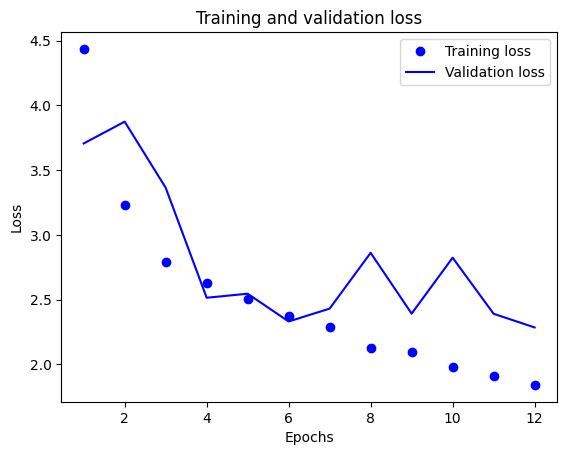

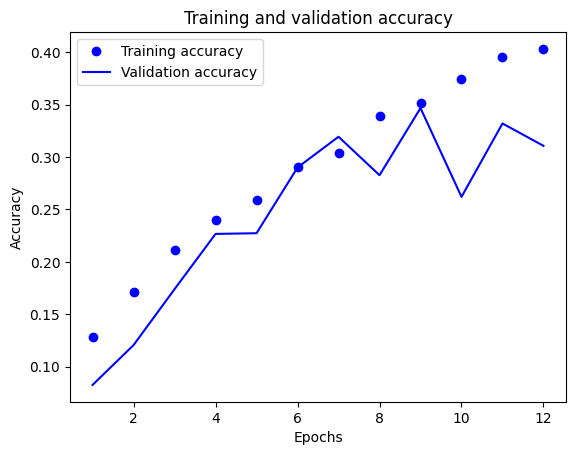

50/50 [==============================] - 1020s 21s/step - loss: 2.4577 - accuracy: 0.3387
test_acc: 0.3386666774749756


In [ ]:
# running the first model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=50,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

plot_history(history)

test_loss, test_acc =model.evaluate(test_generator, steps = 50)

print('test_acc:', test_acc)



## Data Augmentation
Will now add data augmentation and modify the parameters so that we can get some quicker performance

In [ ]:
# applying the data augmentation to our data and creating new generators
train_datagen2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator2 = train_datagen2.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

test_generator2 = test_datagen2.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 5944 images belonging to 23 classes.
Found 1926 images belonging to 23 classes.
Found 1883 images belonging to 23 classes.


Epoch 1/25
50/50 [==============================] - 722s 14s/step - loss: 7.0149 - accuracy: 0.1020 - val_loss: 3.1438 - val_accuracy: 0.0620
Epoch 2/25
50/50 [==============================] - 664s 13s/step - loss: 5.1140 - accuracy: 0.0910 - val_loss: 4.1807 - val_accuracy: 0.0580
Epoch 3/25
50/50 [==============================] - 558s 11s/step - loss: 3.8689 - accuracy: 0.1020 - val_loss: 6.3435 - val_accuracy: 0.0960
Epoch 4/25
50/50 [==============================] - 439s 9s/step - loss: 3.4489 - accuracy: 0.1020 - val_loss: 3.3834 - val_accuracy: 0.0680
Epoch 5/25
50/50 [==============================] - 327s 7s/step - loss: 3.3528 - accuracy: 0.1040 - val_loss: 10.8189 - val_accuracy: 0.0980
Epoch 6/25
50/50 [==============================] - 238s 5s/step - loss: 3.1916 - accuracy: 0.1090 - val_loss: 3.2413 - val_accuracy: 0.0960
Epoch 7/25
50/50 [==============================] - 204s 4s/step - loss: 3.0752 - accuracy: 0.1170 - val_loss: 3.0982 - val_accuracy: 0.0880
Epoch 8/2

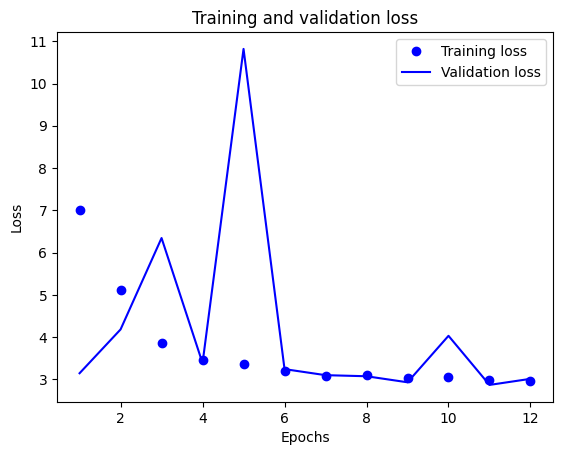

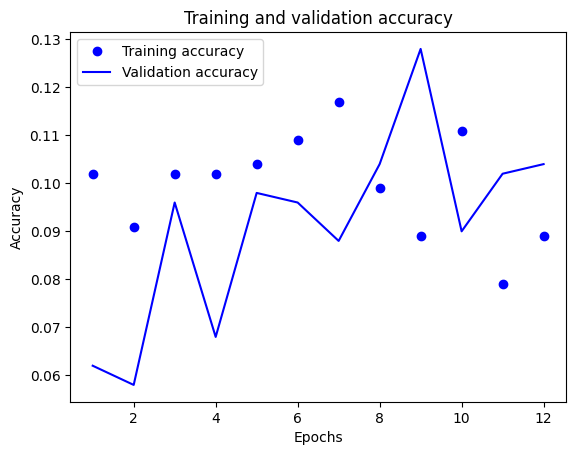

25/25 [==============================] - 241s 10s/step - loss: 2.9034 - accuracy: 0.1080
test_acc: 0.1080000028014183


In [ ]:
# running the model with the augmented data. The steps and epochs are halved in order to speed up the process.
history = model.fit(
    train_generator2,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator2,
    validation_steps=25,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])


plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps = 25)
print('test_acc:', test_acc)

model.save('sea_animals_augmented.keras')

## Pre-Trained Network
Will use a pre-trained network. Our own models were not good in terms of accuracy and performance. It will  be interesting to see if a pretrained network fares better.

I am using the VGG16 network for speed.

In [ ]:
# setting up the VGG16 base
from keras.applications import VGG16

backend.clear_session()
conv_base = VGG16 (weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

conv_base.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# creating the model
def modelvgg():
  backend.clear_session()
  modelvgg16 = models.Sequential()
  modelvgg16.add(conv_base)
  modelvgg16.add(layers.Flatten())
  modelvgg16.add(layers.Dense(512, activation = 'relu'))
  modelvgg16.add(layers.Dense(23, activation = 'softmax'))

  modelvgg16.compile(optimizer = 'rmsprop',
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])


  return modelvgg16

  model = modelvgg()

Epoch 1/25
50/50 [==============================] - 68s 1s/step - loss: 3.0571 - accuracy: 0.0910 - val_loss: 2.9753 - val_accuracy: 0.1060
Epoch 2/25
50/50 [==============================] - 49s 977ms/step - loss: 2.9885 - accuracy: 0.1006 - val_loss: 3.0602 - val_accuracy: 0.0780
Epoch 3/25
50/50 [==============================] - 48s 873ms/step - loss: 2.9789 - accuracy: 0.0860 - val_loss: 2.9318 - val_accuracy: 0.1100
Epoch 4/25
50/50 [==============================] - 41s 827ms/step - loss: 2.9888 - accuracy: 0.0830 - val_loss: 2.8981 - val_accuracy: 0.1140
Epoch 5/25
50/50 [==============================] - 41s 826ms/step - loss: 3.0213 - accuracy: 0.1090 - val_loss: 2.9653 - val_accuracy: 0.1380
Epoch 6/25
50/50 [==============================] - 34s 680ms/step - loss: 2.9437 - accuracy: 0.0930 - val_loss: 2.8934 - val_accuracy: 0.1320
Epoch 7/25
50/50 [==============================] - 29s 586ms/step - loss: 2.9533 - accuracy: 0.1060 - val_loss: 2.8407 - val_accuracy: 0.1360
Ep

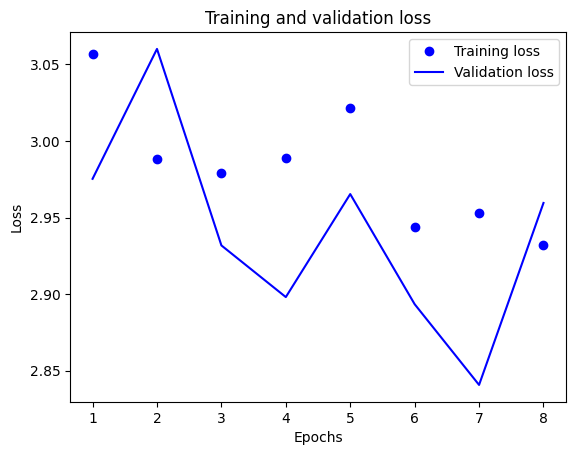

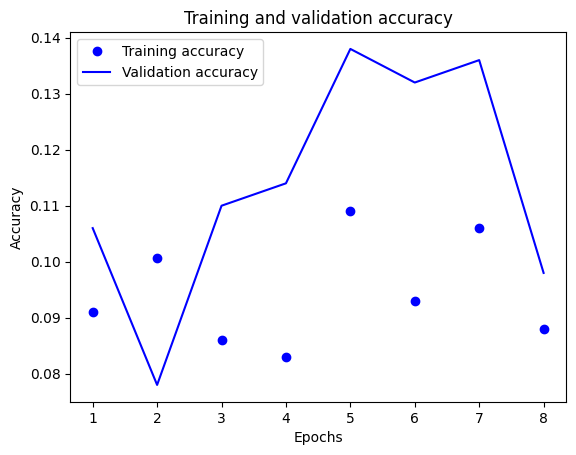

25/25 [==============================] - 199s 8s/step - loss: 2.8387 - accuracy: 0.1180
test_acc: 0.11800000071525574


In [ ]:
# first run through will still use data augmentation
history = model.fit(
    train_generator2,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator2,
    validation_steps=25,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator2, steps = 25)
print('test_acc:', test_acc)

model.save('sea_animals_pretrained.keras')

### Using the unaugmented set to see if the accuracy improves.

The augmented dataset on the VGG16 network did not perform well. Let's see how it performs when we remove the augmentation.

Epoch 1/25
50/50 [==============================] - 45s 853ms/step - loss: 2.9294 - accuracy: 0.0928 - val_loss: 2.7656 - val_accuracy: 0.1253
Epoch 2/25
50/50 [==============================] - 24s 488ms/step - loss: 2.9229 - accuracy: 0.1024 - val_loss: 3.1115 - val_accuracy: 0.1240
Epoch 3/25
50/50 [==============================] - 23s 472ms/step - loss: 2.8550 - accuracy: 0.1160 - val_loss: 3.1967 - val_accuracy: 0.1640
Epoch 4/25
50/50 [==============================] - 21s 418ms/step - loss: 2.8239 - accuracy: 0.1183 - val_loss: 2.7069 - val_accuracy: 0.1547
Epoch 5/25
50/50 [==============================] - 21s 417ms/step - loss: 2.8143 - accuracy: 0.1287 - val_loss: 2.6586 - val_accuracy: 0.1867
Epoch 6/25
50/50 [==============================] - 17s 336ms/step - loss: 2.8240 - accuracy: 0.1408 - val_loss: 2.6763 - val_accuracy: 0.1613
Epoch 7/25
50/50 [==============================] - 17s 350ms/step - loss: 2.7951 - accuracy: 0.1291 - val_loss: 2.6408 - val_accuracy: 0.1827

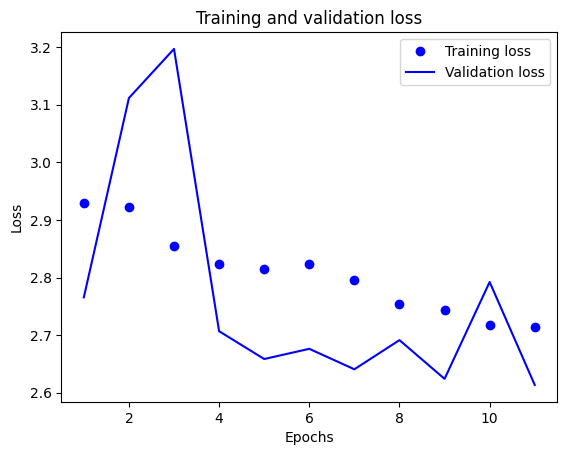

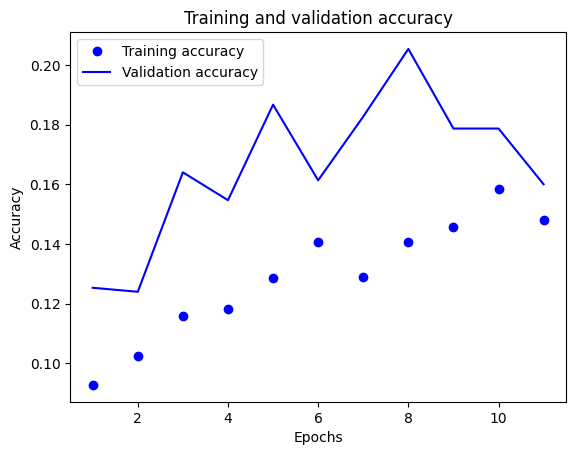

25/25 [==============================] - 183s 8s/step - loss: 2.6800 - accuracy: 0.1880
test_acc: 0.18799999356269836


In [ ]:
# running the model with unaugmented data
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=25,
    verbose = 1,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights = True)])

plot_history(history)

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('test_acc:', test_acc)

model.save('sea_animals_pretrained_not_augmented.keras')

# **Summary**
The project was to train and test a Convultional Neural Network with a sea animals image dataset. There are three main sections of this project (four if you include the setup).

### Project Outline
1.   CNN Base Model
2.   CNN Base Model with augmentation
3.   Pre-Trained Network model

I ended up adding an additional step by using unaugmented data in the pre-trained network.

Each step have plots to get a visual look at how each epoch is doing within the model.

## Analysis
The analysis is pretty easy. The accuracy of each model, no matter what modification used or if a pre-trained network was used, was terrible. A serious deep dive into the models is needed in order to improve it. In fact, they were so bad that I didn't bother with checking to see if any accurate predictions were correct.

So what was the cause of this poor performance? Without a complete dive in, it is difficult to know. It could be that the models were too simple. Could the size of the batches and the number of steps be insufficient? I'm not sure about that last one since the base model pretty much ran through each of the images and the performance was still as bad as the other models. A troubleshooting step would be to use a different dataset which each class had distinguishing characteristics. I suspect that the sea animal dataset had too simliar looking images within the different datasets or had too much vibrancy in order to pick out the actual sea animal (it would be hard, I believe, to pick out coral from the environment without a deep network and some computing power).

It was an interesting excercise for sure. Next time I would probably pick out a simplar dataset to start and then work up to more complexity.



